In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/home/anna/ib/muzak/music_project/temp_data.csv", sep=";")

In [3]:
df.head()

,track_name,mean_energy,ZCR_mean,ZCR_std,spectral_flatness_mean,spectral_flatness_std,spectral_centroids_mean,spectral_centroids_std,spectral_bandwidths_mean,spectral_bandwidths_std,...,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19,MFCC_20
0,Ля_мажор_Моцарт,0.074795,6.076484,1.924883,0.000898,0.028055,0.081112,0.047392,980.226382,219.287091,...,-5.456479,-1.657482,4.654854,2.549605,-2.875899,-5.556747,-6.628302,-5.568473,-7.677846,-3.557798
1,elton_dzhon_blue_sorry_seems_to_be_the_hardest...,0.063699,8.033155,8.148735,0.036727,0.142872,0.279419,0.142315,2345.904312,752.239010,...,-4.191245,-0.330279,-3.164508,-0.349007,-2.200420,1.859461,-3.017477,1.208904,-1.755575,0.599529
2,Robin_Schulz__Sugar_feat._Francesco_Yates,0.033307,9.047992,8.842200,0.023759,0.051523,0.345913,0.172666,2423.612235,677.313737,...,-8.480961,2.376980,-3.935984,3.141425,-5.844786,-1.721986,-5.057473,-2.744251,-5.777932,0.529334
3,model_dlya_sborki_shekli_robert_cherez_picshev...,0.018343,5.795604,5.816792,0.004302,0.011707,0.265293,0.123201,2070.454139,581.760506,...,-15.051490,12.396855,-8.422931,7.008120,-9.678147,8.766813,-1.844657,-2.135070,1.010293,-1.549394
4,Arabian_Nights_2019_Will_Smith,0.014201,7.803405,6.767272,0.040347,0.158868,0.321032,0.129102,2168.309029,532.571878,...,-0.425563,0.220803,-2.546136,2.657563,-4.018467,2.669500,-4.003585,1.422317,-2.827890,-0.375510


In [14]:
x = df.iloc[1:, 1:].values    # features
x = StandardScaler().fit_transform(x)    # standartisation

pca = PCA(n_components=2)       # PCA
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [6]:
principalDf['names'] = df.track_name  # add names

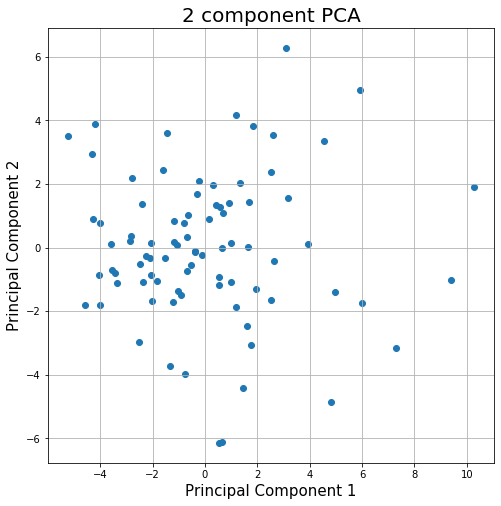

In [7]:
fig = plt.figure(figsize = (8,8)) # plot
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf.loc[:, 'principal component 1']
               , principalDf.loc[:, 'principal component 2'])
ax.grid()

In [9]:
principalDf.to_csv("/home/anna/ib/muzak/principle.csv")

In [ ]:
from sklearn import manifold
from sklearn.metrics import euclidean_distances

nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(similarities, init=pos)


In [18]:
import ecopy as ep

dunes = df.iloc[1:, 1:].values**2
dunes_T = ep.transform(dunes, 'wisconsin')
dunes_D = ep.distance(dunes_T, 'bray')
dunesMDS = ep.MDS(dunes_D, transform='monotone')

/usr/local/lib/python3.6/dist-packages/ecopy/ordination/pcoa.py:138: RuntimeWarning: invalid value encountered in sqrt
  self.U = np.round(self.U.dot(np.diag(np.sqrt(self.evals))), 4)


Finished at iteration 2. Stress = 0.25585132299193775
Finished at iteration 9. Stress = 0.41054320776719727
Finished at iteration 41. Stress = 0.25990112747250965
Finished at iteration 32. Stress = 0.314421991597372
Finished at iteration 33. Stress = 0.32702496233178774
Finished at iteration 48. Stress = 0.3155762958886115
Finished at iteration 9. Stress = 0.4105143178327388
Finished at iteration 38. Stress = 0.29555829913945314
Finished at iteration 36. Stress = 0.27176156277292485
Finished at iteration 9. Stress = 0.40993261142293674
Finished at iteration 51. Stress = 0.2417976715573725
Finished at iteration 9. Stress = 0.4104107526417244
Finished at iteration 91. Stress = 0.2997390980585667
Finished at iteration 28. Stress = 0.27019169852635117
Finished at iteration 9. Stress = 0.41036366119896434
Finished at iteration 62. Stress = 0.26131844890261596
Finished at iteration 56. Stress = 0.27882665707570614
Finished at iteration 9. Stress = 0.41061899083429093
Finished at iteration 9.

In [21]:
dunesMDS.biplot(descriptors==dunes_T)

AttributeError: 'list' object has no attribute 'sum'

Finished at iteration 2. Stress = 0.25585132299193775
Finished at iteration 9. Stress = 0.4103983775536603
Finished at iteration 34. Stress = 0.23996883876323571
Finished at iteration 45. Stress = 0.26575947671920164
Finished at iteration 9. Stress = 0.4105778058297596
Finished at iteration 33. Stress = 0.254859486795468
Finished at iteration 9. Stress = 0.41003307017659485
Finished at iteration 9. Stress = 0.4105488315363392
Finished at iteration 75. Stress = 0.266282710247179
Finished at iteration 43. Stress = 0.2733092521890086
Finished at iteration 10. Stress = 0.4102394955817657
Finished at iteration 10. Stress = 0.4106558401036262
Finished at iteration 10. Stress = 0.41005570380445333
Finished at iteration 82. Stress = 0.25673801474201063
Finished at iteration 10. Stress = 0.41017749234516004
Finished at iteration 10. Stress = 0.4103016330176153
Finished at iteration 45. Stress = 0.2542599469841923
Finished at iteration 40. Stress = 0.3330577941190137
Finished at iteration 10. St

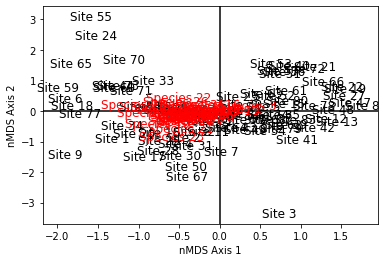

In [22]:
dunes = df.iloc[1:, 1:].values**2
#dunes_T = ep.transform(dunes, 'wisconsin')
dunes_D = ep.distance(dunes_T, 'bray')
dunesMDS = ep.MDS(dunes_D, transform='monotone')
dunesMDS.biplot(descriptors=dunes_T)

Finished at iteration 2. Stress = 0.25585132299193775
Finished at iteration 40. Stress = 0.2971709812445891
Finished at iteration 46. Stress = 0.27857595507559496
Finished at iteration 31. Stress = 0.26359279250436435
Finished at iteration 10. Stress = 0.40994818521227555
Finished at iteration 50. Stress = 0.3227181963210529
Finished at iteration 43. Stress = 0.24952663993197496
Finished at iteration 56. Stress = 0.21789655025766452
Finished at iteration 34. Stress = 0.27511848380753007
Finished at iteration 29. Stress = 0.2400818995439396
Finished at iteration 33. Stress = 0.3130444005939907
Finished at iteration 22. Stress = 0.2783317294701787
Finished at iteration 51. Stress = 0.3119840015704147
Finished at iteration 95. Stress = 0.23081565996219497
Finished at iteration 44. Stress = 0.29539183968575
Finished at iteration 9. Stress = 0.4101463439595024
Finished at iteration 51. Stress = 0.2610001555444147
Finished at iteration 57. Stress = 0.27061936440699763
Finished at iteration 3

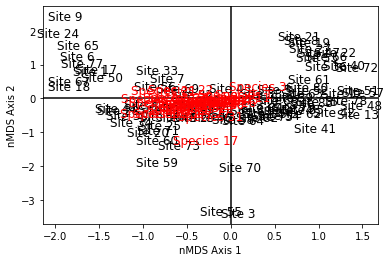

In [23]:
dunes = df.iloc[1:, 1:].values**2
dunes_T = ep.transform(dunes, 'wisconsin')
dunes_D = ep.distance(dunes_T, 'bray')
dunesMDS = ep.MDS(dunes_D)
dunesMDS.biplot(descriptors=dunes_T)

Finished at iteration 2. Stress = 0.25585132299193775
Finished at iteration 9. Stress = 0.4104932912387187
Finished at iteration 25. Stress = 0.2676342971402843
Finished at iteration 9. Stress = 0.4103675388083563
Finished at iteration 41. Stress = 0.30419209178964196
Finished at iteration 80. Stress = 0.2532736741118633
Finished at iteration 35. Stress = 0.3273319451070265
Finished at iteration 26. Stress = 0.26799910198359467
Finished at iteration 23. Stress = 0.2798054761332029
Finished at iteration 43. Stress = 0.260805120880411
Finished at iteration 26. Stress = 0.28266618872001026
Finished at iteration 9. Stress = 0.4097442972490969
Finished at iteration 40. Stress = 0.2988777800667703
Finished at iteration 37. Stress = 0.25681321989127764
Finished at iteration 36. Stress = 0.28912809691752234
Finished at iteration 29. Stress = 0.2600583726315957
Finished at iteration 28. Stress = 0.3143362995955756
Finished at iteration 9. Stress = 0.40938873958539407
Finished at iteration 9. St

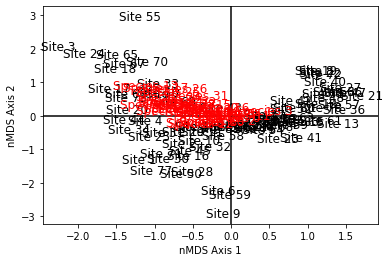

In [24]:
dunes = df.iloc[1:, 1:].values**2
dunes_D = ep.distance(dunes_T, 'bray')
dunesMDS = ep.MDS(dunes_D)
dunesMDS.biplot(descriptors=dunes_T)

Finished at iteration 2. Stress = 0.2447632369027977
Finished at iteration 47. Stress = 0.2797288475476995
Finished at iteration 73. Stress = 0.22964714081067722
Finished at iteration 38. Stress = 0.25493602619524297
Finished at iteration 47. Stress = 0.28649797620511397
Finished at iteration 24. Stress = 0.3149201253566765
Finished at iteration 28. Stress = 0.2336896967431978
Finished at iteration 9. Stress = 0.41060024616825697
Finished at iteration 27. Stress = 0.31392140887246395
Finished at iteration 10. Stress = 0.4096444299523386
Finished at iteration 54. Stress = 0.223276176638189
Finished at iteration 68. Stress = 0.22730878420729178
Finished at iteration 23. Stress = 0.27914066896719303
Finished at iteration 93. Stress = 0.17608594931124272
Finished at iteration 45. Stress = 0.24833671548339448
Finished at iteration 11. Stress = 0.40979928276970196
Finished at iteration 36. Stress = 0.3983812748643681
Finished at iteration 45. Stress = 0.2811565915084526
Finished at iteration

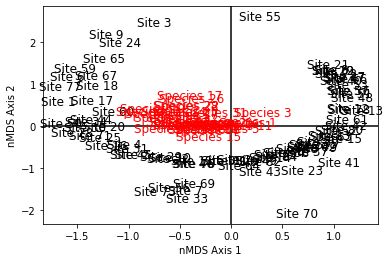

In [25]:
dunes = df.iloc[1:, 1:].values**2
dunes_T = ep.transform(dunes, 'wisconsin')
dunes_D = ep.distance(dunes_T, 'euclidean')
dunesMDS = ep.MDS(dunes_D, transform='monotone')
dunesMDS.biplot(descriptors=dunes_T)

Finished at iteration 2. Stress = 0.2447632369027977
Finished at iteration 35. Stress = 0.28875615768867746
Finished at iteration 39. Stress = 0.25062380010840163
Finished at iteration 10. Stress = 0.4103475744855041
Finished at iteration 54. Stress = 0.25576965257141326
Finished at iteration 46. Stress = 0.37639017188405294
Finished at iteration 43. Stress = 0.28047655737948
Finished at iteration 9. Stress = 0.41025793980340164
Finished at iteration 65. Stress = 0.3735161561122178
Finished at iteration 58. Stress = 0.24993074400742712
Finished at iteration 9. Stress = 0.41059913641796647
Finished at iteration 35. Stress = 0.26852966980214693
Finished at iteration 9. Stress = 0.41047903471246977
Finished at iteration 41. Stress = 0.2815016962289811
Finished at iteration 33. Stress = 0.258135258482409
Finished at iteration 12. Stress = 0.4091394210819779
Finished at iteration 10. Stress = 0.41054293335255115
Finished at iteration 9. Stress = 0.41068957871924705
Finished at iteration 39.

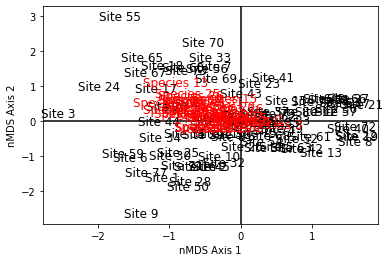

In [26]:
dunes = df.iloc[1:, 1:].values**2
#dunes_T = ep.transform(dunes, 'wisconsin')
dunes_D = ep.distance(dunes_T, 'euclidean')
dunesMDS = ep.MDS(dunes_D, transform='monotone')
dunesMDS.biplot(descriptors=dunes_T)

Finished at iteration 2. Stress = 0.2447632369027977
Finished at iteration 9. Stress = 0.4103801237951204
Finished at iteration 11. Stress = 0.408921577770508
Finished at iteration 38. Stress = 0.2934622659940093
Finished at iteration 38. Stress = 0.24939388481901756
Finished at iteration 24. Stress = 0.29942818108582003
Finished at iteration 34. Stress = 0.2717450261485609
Finished at iteration 24. Stress = 0.28443581999352635
Finished at iteration 39. Stress = 0.26890330069180157
Finished at iteration 59. Stress = 0.27505514794939656
Finished at iteration 41. Stress = 0.2721219861065962
Finished at iteration 8. Stress = 0.41044460644497616
Finished at iteration 9. Stress = 0.4103462075259867
Finished at iteration 10. Stress = 0.41033686238596057
Finished at iteration 52. Stress = 0.3967380395735021
Finished at iteration 11. Stress = 0.40962070317259297
Finished at iteration 28. Stress = 0.27299408329692
Finished at iteration 68. Stress = 0.26735317530484226
Finished at iteration 9. S

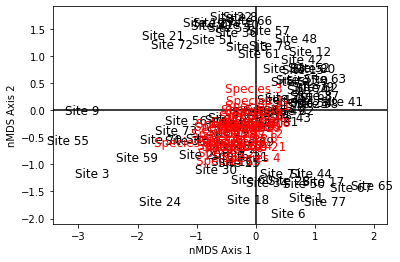

In [27]:
dunes = df.iloc[1:, 1:].values**2
dunes_T = ep.transform(dunes, 'wisconsin')
dunes_D = ep.distance(dunes_T, 'euclidean')
dunesMDS = ep.MDS(dunes_D)
dunesMDS.biplot(descriptors=dunes_T)

Finished at iteration 2. Stress = 0.2447632369027977
Finished at iteration 50. Stress = 0.27935466399474945
Finished at iteration 9. Stress = 0.41039722159913666
Finished at iteration 67. Stress = 0.24939035572997384
Finished at iteration 9. Stress = 0.4105759361260587
Finished at iteration 28. Stress = 0.28087640275129205
Finished at iteration 9. Stress = 0.41062965106246685
Finished at iteration 24. Stress = 0.3477297712953891
Finished at iteration 81. Stress = 0.3465535913948288
Finished at iteration 32. Stress = 0.26051562665355693
Finished at iteration 9. Stress = 0.41041530581414637
Finished at iteration 22. Stress = 0.29195452460757443
Finished at iteration 8. Stress = 0.41052283403948614
Finished at iteration 33. Stress = 0.2539274142764516
Finished at iteration 30. Stress = 0.2742110295190519
Finished at iteration 9. Stress = 0.4102850264416607
Finished at iteration 79. Stress = 0.2347665819887164
Finished at iteration 44. Stress = 0.31619198291914496
Finished at iteration 9. 

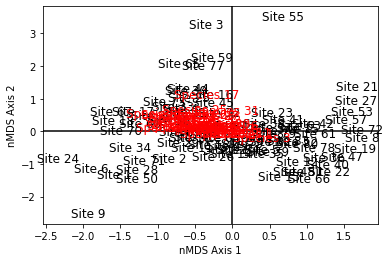

In [28]:
dunes = df.iloc[1:, 1:].values**2
dunes_D = ep.distance(dunes_T, 'euclidean')
dunesMDS = ep.MDS(dunes_D)
dunesMDS.biplot(descriptors=dunes_T)

Finished at iteration 26. Stress = 0.13584249422533065
Finished at iteration 9. Stress = 0.41070394160298007
Finished at iteration 52. Stress = 0.24465403203293887
Finished at iteration 22. Stress = 0.29748436641477227
Finished at iteration 22. Stress = 0.28748365566212974
Finished at iteration 9. Stress = 0.4105420319709562
Finished at iteration 41. Stress = 0.21775035918788202
Finished at iteration 174. Stress = 0.14874610103887279
Finished at iteration 88. Stress = 0.1918458313780295
Finished at iteration 92. Stress = 0.1696762413096514
Finished at iteration 47. Stress = 0.19499161119569763
Finished at iteration 29. Stress = 0.2889897201941489
Finished at iteration 15. Stress = 0.29772178672399935
Finished at iteration 16. Stress = 0.3868171563413514
Finished at iteration 20. Stress = 0.2603581559277239
Finished at iteration 64. Stress = 0.23464514100668143
Finished at iteration 111. Stress = 0.14614750571919652
Finished at iteration 9. Stress = 0.410620738894366
Finished at iterati

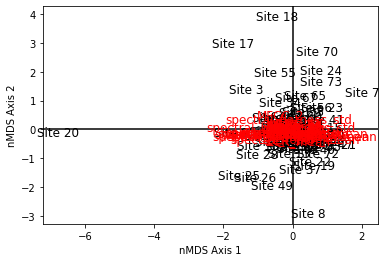

In [31]:
dunes = df.iloc[1:, 1:] - df.iloc[1:, 1:].min()
dunes_T = ep.transform(dunes, 'wisconsin')
dunes_D = ep.distance(dunes_T, 'euclidean')
dunesMDS = ep.MDS(dunes_D)
dunesMDS.biplot(descriptors=dunes_T)

Finished at iteration 26. Stress = 0.13584249422533065
Finished at iteration 18. Stress = 0.27390952107413274
Finished at iteration 22. Stress = 0.28423157116704717
Finished at iteration 44. Stress = 0.18151182340759295
Finished at iteration 46. Stress = 0.2169604578925394
Finished at iteration 17. Stress = 0.30006821183397253
Finished at iteration 23. Stress = 0.31322851875697366
Finished at iteration 9. Stress = 0.4105990206677768
Finished at iteration 100. Stress = 0.1415844282916565
Finished at iteration 13. Stress = 0.34080165510102006
Finished at iteration 13. Stress = 0.38675385162474873
Finished at iteration 62. Stress = 0.16167570193954978
Finished at iteration 9. Stress = 0.4103861079000864
Finished at iteration 8. Stress = 0.41069473045459415
Finished at iteration 53. Stress = 0.22849947341989837
Finished at iteration 9. Stress = 0.41054774107288977
Finished at iteration 20. Stress = 0.2999138794416795
Finished at iteration 24. Stress = 0.2475350612719438
Finished at iterati

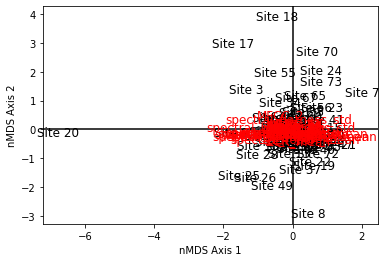

In [32]:
dunes = df.iloc[1:, 1:] - df.iloc[1:, 1:].min()
#dunes_T = ep.transform(dunes, 'wisconsin')
dunes_D = ep.distance(dunes_T, 'euclidean')
dunesMDS = ep.MDS(dunes_D)
dunesMDS.biplot(descriptors=dunes_T)

Finished at iteration 26. Stress = 0.13584249422533065
Finished at iteration 34. Stress = 0.23712873215073138
Finished at iteration 13. Stress = 0.3438963671340723
Finished at iteration 17. Stress = 0.30063304202821334
Finished at iteration 103. Stress = 0.14227420389808176
Finished at iteration 18. Stress = 0.31681944741539636
Finished at iteration 12. Stress = 0.3825001845019106
Finished at iteration 8. Stress = 0.41071407562909856
Finished at iteration 28. Stress = 0.25160292167852305
Finished at iteration 74. Stress = 0.16437489618321605
Finished at iteration 100. Stress = 0.1459630985312328
Finished at iteration 30. Stress = 0.24693227490396277
Finished at iteration 21. Stress = 0.2832864282006413
Finished at iteration 24. Stress = 0.2809353698560922
Finished at iteration 16. Stress = 0.27616267792056026
Finished at iteration 77. Stress = 0.13798755005003474
Finished at iteration 23. Stress = 0.30136194288675755
Finished at iteration 81. Stress = 0.14364556289881966
Finished at it

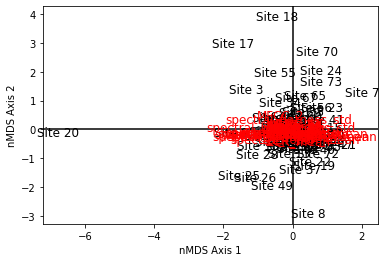

In [34]:
dunes = df.iloc[1:, 1:] - df.iloc[1:, 1:].min()
dunes_T = ep.transform(dunes, 'wisconsin')
dunes_D = ep.distance(dunes_T, 'euclidean')
dunesMDS = ep.MDS(dunes_D, transform='monotone')
dunesMDS.biplot(descriptors=dunes_T)

Finished at iteration 26. Stress = 0.13584249422533065
Finished at iteration 30. Stress = 0.26761558108423844
Finished at iteration 25. Stress = 0.2844518931903489
Finished at iteration 33. Stress = 0.30243567858749454
Finished at iteration 33. Stress = 0.2598744089323735
Finished at iteration 28. Stress = 0.29253428349908805
Finished at iteration 98. Stress = 0.13803253715551533
Finished at iteration 24. Stress = 0.3837439429483558
Finished at iteration 93. Stress = 0.15178344388748916
Finished at iteration 29. Stress = 0.26376812158483337
Finished at iteration 109. Stress = 0.13769351425266257
Finished at iteration 17. Stress = 0.29513940201413336
Finished at iteration 23. Stress = 0.2786673344500019
Finished at iteration 9. Stress = 0.4105451887199946
Finished at iteration 62. Stress = 0.1816010446783306
Finished at iteration 31. Stress = 0.22944735505931815
Finished at iteration 21. Stress = 0.27464491174330036
Finished at iteration 107. Stress = 0.14346601017354832
Finished at ite

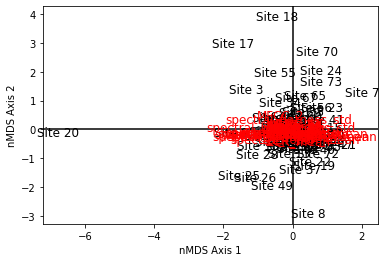

In [35]:
dunes = df.iloc[1:, 1:] - df.iloc[1:, 1:].min()
#dunes_T = ep.transform(dunes, 'wisconsin')
dunes_D = ep.distance(dunes_T, 'euclidean')
dunesMDS = ep.MDS(dunes_D, transform='monotone')
dunesMDS.biplot(descriptors=dunes_T)

Finished at iteration 24. Stress = 0.1425401852519962
Finished at iteration 45. Stress = 0.16651627359287582
Finished at iteration 77. Stress = 0.14679529742800798
Finished at iteration 152. Stress = 0.15102232973486476
Finished at iteration 157. Stress = 0.15343278453949125
Finished at iteration 9. Stress = 0.41020528414990487
Finished at iteration 10. Stress = 0.4097161884995956
Finished at iteration 21. Stress = 0.30479564610440546
Finished at iteration 88. Stress = 0.18708421876475492
Finished at iteration 25. Stress = 0.2910634117911254
Finished at iteration 58. Stress = 0.1520472229547561
Finished at iteration 22. Stress = 0.3062551440789619
Finished at iteration 16. Stress = 0.37709901469263507
Finished at iteration 135. Stress = 0.1606747415905241
Finished at iteration 21. Stress = 0.30669112473622534
Finished at iteration 45. Stress = 0.23694667505973485
Finished at iteration 17. Stress = 0.3018993215634479
Finished at iteration 70. Stress = 0.15881628054493782
Finished at ite

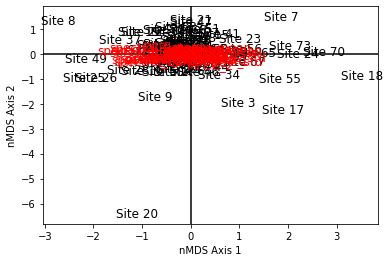

In [36]:
dunes = df.iloc[1:, 1:] - df.iloc[1:, 1:].min()
dunes_T = ep.transform(dunes, 'wisconsin')
dunes_D = ep.distance(dunes_T, 'bray')
dunesMDS = ep.MDS(dunes_D, transform='monotone')
dunesMDS.biplot(descriptors=dunes_T)

Finished at iteration 24. Stress = 0.1425401852519962
Finished at iteration 16. Stress = 0.3059109434671884
Finished at iteration 53. Stress = 0.19444847639470514
Finished at iteration 27. Stress = 0.27196074917024465
Finished at iteration 34. Stress = 0.24777198145916443
Finished at iteration 26. Stress = 0.3107551876971587
Finished at iteration 21. Stress = 0.31589812748618534
Finished at iteration 9. Stress = 0.4102752569953083
Finished at iteration 138. Stress = 0.16422508458178262
Finished at iteration 38. Stress = 0.18382751844202808
Finished at iteration 36. Stress = 0.25384291945321386
Finished at iteration 64. Stress = 0.24675613290865592
Finished at iteration 47. Stress = 0.21416379045714878
Finished at iteration 71. Stress = 0.15491066102481857
Finished at iteration 18. Stress = 0.30795529581880765
Finished at iteration 115. Stress = 0.184892175769316
Finished at iteration 94. Stress = 0.20408996047752662
Finished at iteration 110. Stress = 0.14948148406101644
Finished at it

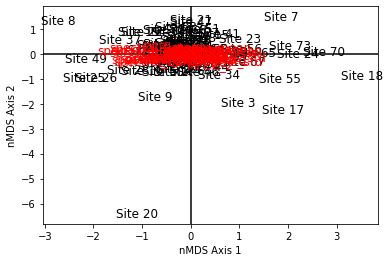

In [37]:
dunes = df.iloc[1:, 1:] - df.iloc[1:, 1:].min()
#dunes_T = ep.transform(dunes, 'wisconsin')
dunes_D = ep.distance(dunes_T, 'bray')
dunesMDS = ep.MDS(dunes_D, transform='monotone')
dunesMDS.biplot(descriptors=dunes_T)

Finished at iteration 24. Stress = 0.1425401852519962
Finished at iteration 9. Stress = 0.41043450290466804
Finished at iteration 21. Stress = 0.3001683649521287
Finished at iteration 16. Stress = 0.2977225248116823
Finished at iteration 95. Stress = 0.15500912766199143
Finished at iteration 22. Stress = 0.28534278976673233
Finished at iteration 77. Stress = 0.1949186514320997
Finished at iteration 17. Stress = 0.30267978496571485
Finished at iteration 31. Stress = 0.2558321502467902
Finished at iteration 9. Stress = 0.4105645380807768
Finished at iteration 43. Stress = 0.23756336788647067
Finished at iteration 20. Stress = 0.28240676468248577
Finished at iteration 21. Stress = 0.30198739564889054
Finished at iteration 85. Stress = 0.18590742324896978
Finished at iteration 11. Stress = 0.39662200366637407
Finished at iteration 74. Stress = 0.14943632975750706
Finished at iteration 39. Stress = 0.23391514770863714
Finished at iteration 15. Stress = 0.31196930713233045
Finished at iterat

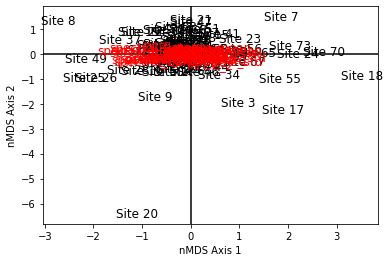

In [38]:
dunes = df.iloc[1:, 1:] - df.iloc[1:, 1:].min()
#dunes_T = ep.transform(dunes, 'wisconsin')
dunes_D = ep.distance(dunes_T, 'bray')
dunesMDS = ep.MDS(dunes_D)
dunesMDS.biplot(descriptors=dunes_T)

Finished at iteration 24. Stress = 0.1425401852519962
Finished at iteration 14. Stress = 0.3879722656166664
Finished at iteration 19. Stress = 0.2775231500329467
Finished at iteration 61. Stress = 0.2475899826155604
Finished at iteration 32. Stress = 0.29230520141009325
Finished at iteration 25. Stress = 0.2630269687081259
Finished at iteration 38. Stress = 0.24508163454010254
Finished at iteration 34. Stress = 0.25995157192987206
Finished at iteration 19. Stress = 0.3100529932224301
Finished at iteration 88. Stress = 0.15111253203931696
Finished at iteration 77. Stress = 0.2150526779579044
Finished at iteration 15. Stress = 0.3003311844346092
Finished at iteration 48. Stress = 0.2235801592195004
Finished at iteration 77. Stress = 0.17794057429019422
Finished at iteration 44. Stress = 0.2515408709096798
Finished at iteration 20. Stress = 0.29515666848645356
Finished at iteration 27. Stress = 0.2930494585057292
Finished at iteration 13. Stress = 0.3945106538785279
Finished at iteration 

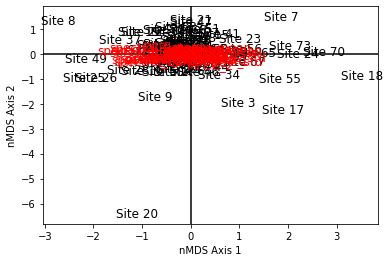

In [39]:
dunes = df.iloc[1:, 1:] - df.iloc[1:, 1:].min()
dunes_T = ep.transform(dunes, 'wisconsin')
dunes_D = ep.distance(dunes_T, 'bray')
dunesMDS = ep.MDS(dunes_D)
dunesMDS.biplot(descriptors=dunes_T)

In [42]:
dunesMDS.scores

array([[-4.06822838e-01, -7.08902055e-01],
       [-7.15637838e-01, -3.75474394e-01],
       [ 9.71343764e-01, -1.95733554e+00],
       [ 2.70230980e-01, -1.99320547e-01],
       [-6.76354479e-01, -6.71617688e-02],
       [-6.47771008e-02, -6.69544288e-01],
       [ 1.85604439e+00,  1.50317114e+00],
       [-2.72361793e+00,  1.33921762e+00],
       [-7.29394999e-01, -1.71560579e+00],
       [-3.21181391e-01, -2.44596345e-01],
       [-1.78017845e-01, -2.82814692e-01],
       [-1.77900311e-01,  3.24857059e-01],
       [-8.65056640e-01,  1.46858372e-01],
       [-1.85074311e-01,  8.14880461e-02],
       [ 3.49483782e-01,  7.50164211e-01],
       [-9.99650277e-01, -6.90824752e-01],
       [ 1.90533250e+00, -2.23239793e+00],
       [ 3.52967250e+00, -8.72453495e-01],
       [-1.05282259e+00,  8.95959768e-01],
       [-1.09993032e+00, -6.41483257e+00],
       [ 6.47936909e-03,  1.36511441e+00],
       [-9.92552248e-01,  8.66337280e-01],
       [ 1.02277788e+00,  6.23907276e-01],
       [ 2.